# HTP (Hard Thresholding Pursuit)

HTP completely update (refresh) the support set in each iterations, so that it is easy to correct direction.

#Algorithm
 
## A. Initialization

At first, y is set to a residual $r$, and estimated signal $z$ is zero vector.

$$
\hat{z}_0 = O \\
r_0       = y \\
S_0 = \phi  \\
$$


In [14]:
    # in class Greedy
    def __init__(self, A, y):
        
        # Initialization 
        self.z  = np.zeros(self.n, dtype=np.complex)
        self.r  = self.y

        
    # in class HTP
    def __init__(self, A, y, k):
    
        self.S      = set([]) # support set (indexes)

## B. Iteration

### 1. Find the index of a most correlated entry

$$
S_i = L_k \left( z_{i-1} + A^* r_{i-1} \right)
$$

where $L_k$ is a hard thresholding operator to get the idexes of $k$ largest entries.


### 2. $l_2$ minimization

Combine columns of which indexes are in the support set $S$, as $A_s$.

$$ A_s = \{ A_k ~|~ k \in S_i \} $$

Next, do $l_2$ minimization by using the pseudo inverse matrix of $A_s$.

$$ \hat{z}_i = {A_s}^- y  $$


In [15]:
    def iterate(self):    
       
        # update support sets 
        p        = self.z + np.dot( np.conj(self.A.T), self.r ) 
        self.S   = set( indexThresholding(p, self.k) )
         
        # make a matrix which of columns have the index in S
        As  = self.A[:, sorted(self.S)]

        # to minimum solution of || As z - y ||2 = 0,
        # solve least square
        zs  = np.dot( np.linalg.pinv(As), self.y )
        
        # make approximated signal z,
        # the entries of which are the solutions of
        # the previous least square
        z  = np.zeros(self.A.shape[1], dtype=np.complex)
        for j, s in enumerate(sorted(self.S)):
            z[s] = zs[j]

        return z 

### 3. Update residual
$$ r_i  = y - A \hat{z}_i $$

## Demo

sparsity: $k/n \approx $ 6.7%, number of measurements: $m = n \times 0.30 = 9$

### 1. prepare test signal

2-sparse test signal $x \in R^{10}$. We do not know which entries this signal has.

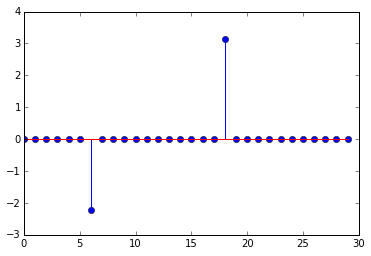

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n         =  30
x         =  np.zeros(n)
x[n*0.2]  = -np.sqrt(5) # 1.73
x[n*0.6]  =  np.pi      # 3.14

N = np.arange(n)
plt.stem(x)
plt.show()

### 2. linear measurement

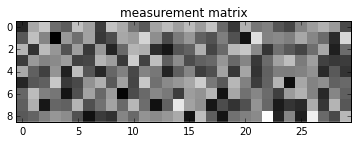

In [17]:
from CSToolbox.generator.random_matrix import gaussian

m  =  n*0.30 # number of measurement (10% of vector length)
A  =  gaussian(m,n)

plt.title('measurement matrix')
plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

In [18]:
y = np.dot(A, x)
print y

[-0.84759014 -0.45067097  0.65973092  1.33440225  1.40813043 -0.98754781
 -2.5988034  -0.29267593 -0.51565431]


### 3. sparse recovery

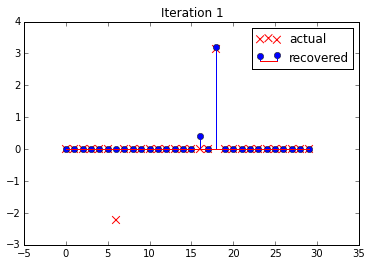

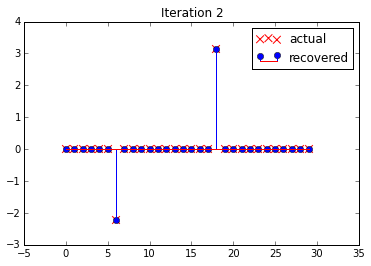

Converged
------- summary ------
[ HTP ]
number of iterations: 2
specified error:   1.00e-05
residual norm (e): 4.55e-16



In [20]:
from CSToolbox.greedy.HTP import HTP

iterator = HTP(A, y, k=2)
iterator.set_maxiterations(5)

for z in iterator:
    plt.title('Iteration %d' % iterator.iterations )
    plt.stem(z.real, label='recovered')
    plt.scatter(N, x, s=60, c='r', marker='x', label='actual')
    plt.legend()
    plt.show()